<a href="https://colab.research.google.com/github/Mariana2079/Sistemas-inteligentes/blob/main/T1_inteligentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

Base de dados

In [ ]:
from google.colab import files

df = pd.read_csv('dataset.csv') 
print("\nDataset completo:\n\n ")
print(df)
X = df.iloc[0:99,[1,3]] 
print("\nDados que serão utilizados:\n ")
print(X)



Dataset completo:

 
    age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    75                       582                 20  265000.00   
1    55                      7861                 38  263358.03   
2    65                       146                 20  162000.00   
3    50                       111                 20  210000.00   
4    65                       160                 20  327000.00   
..  ...                       ...                ...        ...   
95   58                       133                 60  219000.00   
96   63                       514                 25  254000.00   
97   70                        59                 60  255000.00   
98   60                       156                 25  318000.00   
99   63                        61                 40  221000.00   

    serum_creatinine  serum_sodium  
0                1.9           130  
1                1.1           136  
2                1.3           129  
3                1.9     

10 otimizadores lineares

In [ ]:
import random
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

y_true = df.iloc[0:99,3]
print("Y_TRUE",y_true)

for i in range(10, -1, -1): 
  w1 = random.random()
  w2 = random.random()
  w3 = random.random()
  print("\nw1",w1)
  print("\nw2",w2)
  print("\nw3",w3)
  y_pred = w1*X.iloc[:,0] + w2*X.iloc[:,1] - w3
  print("\nY_PRED",y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred, squared=False)
  print("Mean Absolute Error (MAE): ",mae)
  print("Mean Squared Error (MSE): ",mse)
  #para comparar os erros usar a função amin() que retorna o menor valor ao longo do vetor criado
  array = np.array([mae,mse,y_pred])   
  print("Array",array)

Y_TRUE 0     265000.00
1     263358.03
2     162000.00
3     210000.00
4     327000.00
        ...    
94    327000.00
95    219000.00
96    254000.00
97    255000.00
98    318000.00
Name: platelets, Length: 99, dtype: float64

w1 0.12420385977773352

w2 0.04152532753156224

w3 0.18901341724238785

Y_PRED 0     11076.309429
1     11912.205982
2      6745.047810
3      8733.916397
4     13598.465707
          ...     
94    13596.478445
95     9110.376829
96    10611.084964
97    10596.097535
98    13224.240944
Length: 99, dtype: float64
Mean Absolute Error (MAE):  252021.9909428731
Mean Squared Error (MSE):  265108.89812632155
Array [252021.9909428731 265108.89812632155 0     11076.309429
                                      1     11912.205982
                                      2      6745.047810
                                      3      8733.916397
                                      4     13598.465707
                                                ...
                      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/lo

Superfície de erro

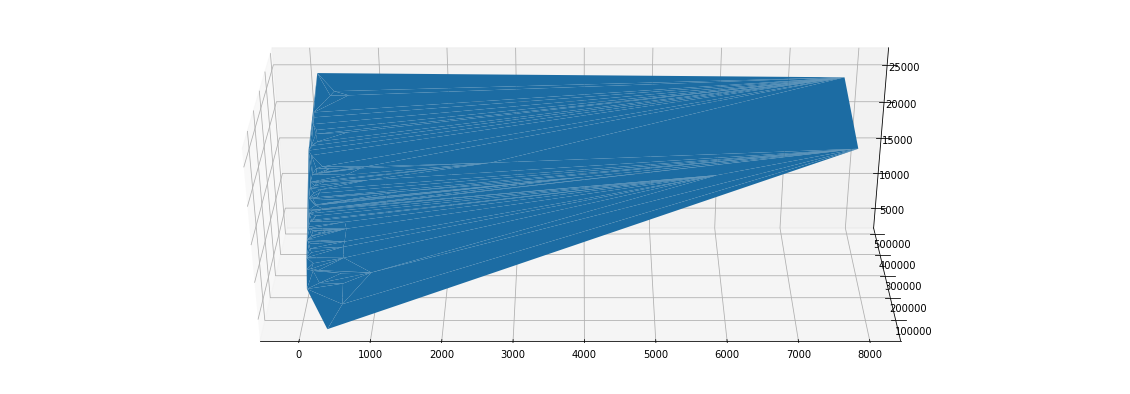

In [ ]:
fig = plt.figure(figsize=(20,7))
ax = fig.gca(projection='3d')
ax.plot_trisurf(X.iloc[:,0], X.iloc[:,1], y_pred)

ax.view_init(elev=30, azim=-90)

plt.show()


In [ ]:

import numpy as np
from google.colab import files

points2D = np.vstack([X.iloc[:,0],X.iloc[:,1]]).T
from scipy.spatial import Delaunay

tri = Delaunay(points2D)
simplices = tri.simplices

import plotly.figure_factory as ff

fig = ff.create_trisurf(X.iloc[:,0], X.iloc[:,1], y_pred, simplices=simplices, aspectratio=dict(x=1, y=1, z=0.3))
fig.show()

